In [1]:
#Importing necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import os

%matplotlib inline

In [2]:

# setup logger# setup l 
log_fmt = '%(asctime)s - %(name)s - %(levelname)s - %(message)s'
logging.basicConfig(level=logging.INFO, format=log_fmt)
    
# get logger
logger = logging.getLogger(__name__)

In [3]:

# Check if interactive plot is enabled, if not enable it.# Check i 

logger.info('Checking Interactive session')
    
if plt.isinteractive():
    print("Plotting is not interactive, Setting it to interactive mode ...")
    plt.interactive(True)
else:
    print("Plotting is already interactive")

2019-01-23 20:00:35,491 - __main__ - INFO - Checking Interactive session


Plotting is not interactive, Setting it to interactive mode ...


## DataVariables

Description

Loan_ID : Unique Loan ID <br>
Gender  : Male/ Female <br>

Married : Applicant married (Y/N) <br>

Dependents : Number of dependents <br>

Education : Applicant Education (Graduate/ Under Graduate) <br>

Self_Employed : Self employed (Y/N) <br>

ApplicantIncome : Applicant income <br>

CoapplicantIncome : Coapplicant income <br>

LoanAmount : Loan amount in thousands <br> 

Loan_Amount_Term : Term of loan in months <br>

Credit_History : credit history meets guidelines <br>

Property_Area : Urban/ Semi Urban/ Rural <br>

Loan_Status : Loan approved (Y/N) <br>

 

Note: <br>

Evaluation Metric is accuracy i.e. percentage of loan approval you correctly predict.<br>
You are expected to upload the solution in the format of "sample_submission.csv"

In [4]:
#Read DataSets
logger.info('Reading the loan datasets')


train_dataset = pd.read_csv(r"C:\Users\divyakamat\data\DataSets\loan\train.csv")
test_dataset = pd.read_csv(r"C:\Users\divyakamat\data\DataSets\loan\test.csv")

2019-01-23 20:00:35,647 - __main__ - INFO - Reading the loan datasets


In [5]:
train_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
#Generic function to count the number of rows and columns in train and test datasets

def file_count(dataset,typ):
    rows, columns = dataset.shape
    print("There are {0} rows in {1} dataset".format(rows,typ))
    print("There are {0} columns in {1} dataset\n".format(columns,typ))

#Invoke the function by passing the dataset name and the type of file
file_count(train_dataset,"training")
file_count(test_dataset,"test")

There are 614 rows in training dataset
There are 13 columns in training dataset

There are 367 rows in test dataset
There are 12 columns in test dataset



In [7]:
#map 999 value for Loan_Status column in test dataset and then concatenate training and test data
#axis = 1 --> Indicates, datasets would be combined colummn wise i.e., dataset1,dataset2
#axis = 0 --> Indicates, datasets would be combined row wise i.e., dataset1
#                                                                  dataset2

logger.info('Mapping NNN to Loan_Status column in test dataset')
logger.info('Concatenating train and test dataset')

test_dataset['Loan_Status']= 'NNN'
df_loan_dataset= pd.concat((train_dataset,test_dataset),axis=0)

2019-01-23 20:00:36,319 - __main__ - INFO - Mapping NNN to Loan_Status column in test dataset
2019-01-23 20:00:36,319 - __main__ - INFO - Concatenating train and test dataset


In [8]:
#convert all the columns to lower case
def to_lower(dataframe):
    dataframe.columns = map(str.lower,dataframe.columns)

logger.info("Converting all the columns to lower case")
to_lower(df_loan_dataset)

2019-01-23 20:00:36,444 - __main__ - INFO - Converting all the columns to lower case


In [9]:
#
logger.info("Getting the stats for columns")

print("There are totally {0} columns and they are \n\
        {1} \n".format(len(df_loan_dataset.columns),df_loan_dataset.columns))

#fetch numerical columns
df_loan_num_dataset = df_loan_dataset.select_dtypes(include=[np.number])
print("NUMERICAL COLUMNS :\n There are totally {0} numerical columns and they are \n\
        {1}".format(len(df_loan_num_dataset.columns),df_loan_num_dataset.columns))

#fetch non numerical columns
df_loan_obj_dataset = df_loan_dataset.select_dtypes(include=[np.object])
print("NON NUMERICAL COLUMNS :\n There are totally {0} numerical columns and they are \n\
        {1}".format(len(df_loan_obj_dataset.columns),df_loan_obj_dataset.columns))

2019-01-23 20:00:36,554 - __main__ - INFO - Getting the stats for columns


There are totally 13 columns and they are 
        Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object') 

NUMERICAL COLUMNS :
 There are totally 5 numerical columns and they are 
        Index(['applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history'],
      dtype='object')
NON NUMERICAL COLUMNS :
 There are totally 8 numerical columns and they are 
        Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'property_area', 'loan_status'],
      dtype='object')


Features where the categories are only labeled without any order of precedence are called nominal features.

Features which have some order associated with them are called ordinal features. For example, a feature like economic status, with three categories: low, medium and high, which have an order associated with them.

In [10]:
df_loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
loan_id              981 non-null object
gender               957 non-null object
married              978 non-null object
dependents           956 non-null object
education            981 non-null object
self_employed        926 non-null object
applicantincome      981 non-null int64
coapplicantincome    981 non-null float64
loanamount           954 non-null float64
loan_amount_term     961 non-null float64
credit_history       902 non-null float64
property_area        981 non-null object
loan_status          981 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


## Summary Statistics

In [11]:
df_loan_dataset.describe()

,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [12]:
#New function to get the count of null values
def mising_num(x):
    return sum(x.isnull())

#Apply per column
print("Missing values per column in loan dataset")
print(df_loan_dataset.apply(mising_num,axis=0))  #axis=0 defines that function is to be applied on each column

Missing values per column in loan dataset
loan_id               0
gender               24
married               3
dependents           25
education             0
self_employed        55
applicantincome       0
coapplicantincome     0
loanamount           27
loan_amount_term     20
credit_history       79
property_area         0
loan_status           0
dtype: int64


In [13]:
df_loan_dataset[(df_loan_dataset["dependents"].notnull()) & (df_loan_dataset["married"]=="Yes")]

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
10,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002817443C518>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002817476EF98>]], dtype=object)

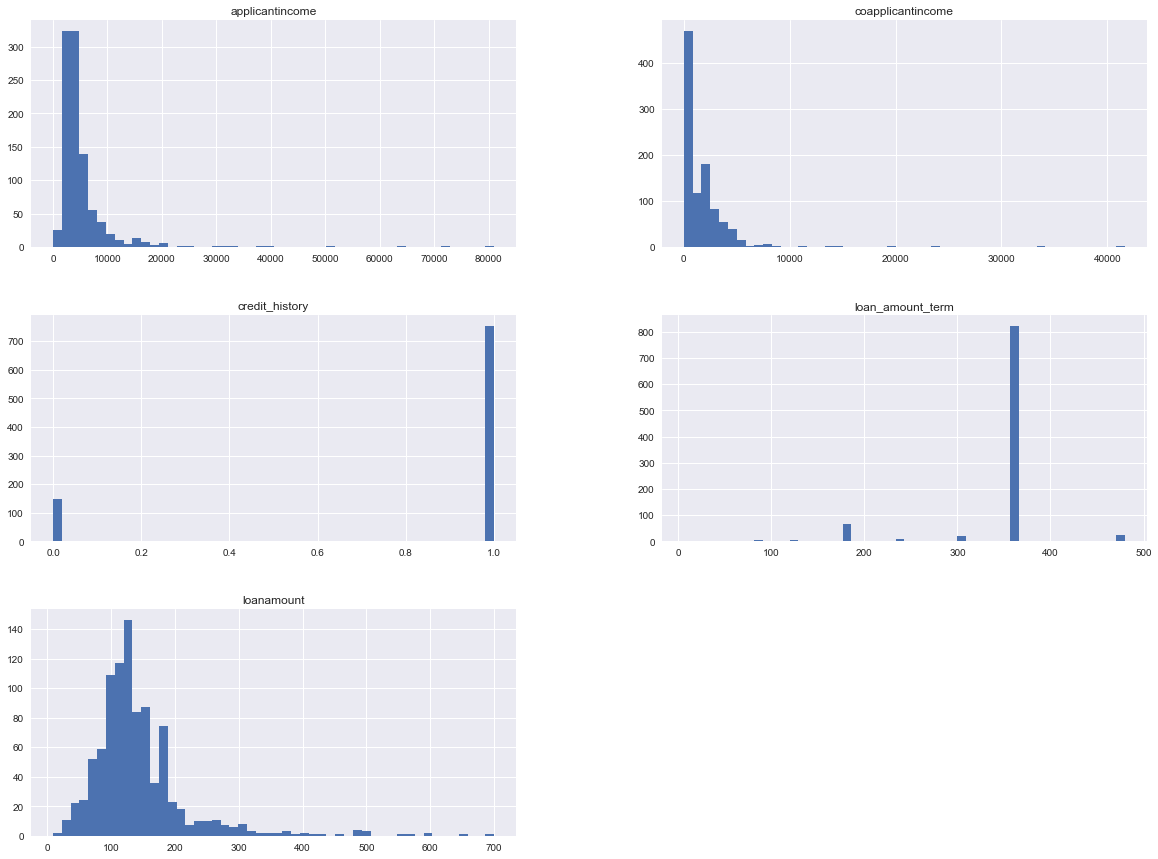

In [14]:
df_loan_dataset.hist(bins=50,figsize=(20,15))

Possible skew in the data by comparing the mean to the median 

mean > meadian - skewed to the right (that is, bunched up toward the left and with a "tail" stretching toward the right). 

mean < median - skewed to the left (that is, bunched up toward the left and with a "tail" stretching toward the right). 

### Categotical Features
As you will only be dealing with categorical features in this tutorial, it's better to filter them out. You can create a separate DataFrame consisting of only these features by running the following command. The method .copy() is used here so that any changes made in new DataFrame don't get reflected in the original one.

In [15]:

cat_df_loan = df_loan_dataset.select_dtypes(include=['object']).copy()
cat_df_loan.head()

,loan_id,gender,married,dependents,education,self_employed,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [16]:
#Apply per column
print("Missing values per column in loan dataset for categorical columns")
print(cat_df_loan.apply(mising_num,axis=0))  #axis=0 defines that function is to be applied on each column

Missing values per column in loan dataset for categorical columns
loan_id           0
gender           24
married           3
dependents       25
education         0
self_employed    55
property_area     0
loan_status       0
dtype: int64


In [17]:
#Print value counts for all categorical variables

def value(df):    
    for i in cat_df_loan.columns:
        if i != "loan_id":
            print(df[i].value_counts() , "\n")

print("Print value counts for all categorical variables:\n")
value(cat_df_loan)  

Print value counts for all categorical variables:

Male      775
Female    182
Name: gender, dtype: int64 

Yes    631
No     347
Name: married, dtype: int64 

0     545
2     160
1     160
3+     91
Name: dependents, dtype: int64 

Graduate        763
Not Graduate    218
Name: education, dtype: int64 

No     807
Yes    119
Name: self_employed, dtype: int64 

Semiurban    349
Urban        342
Rural        290
Name: property_area, dtype: int64 

Y      422
NNN    367
N      192
Name: loan_status, dtype: int64 



In [31]:
##Need to get this working
#

# f, (axes) = plt.subplots(nrows=2, ncols=4, sharey=True,figsize=(15,6))

# for i in cat_df_loan.columns:
#     for j in axes.flat:
#         sns.countplot(x=i,data=cat_df_loan,ax=j)

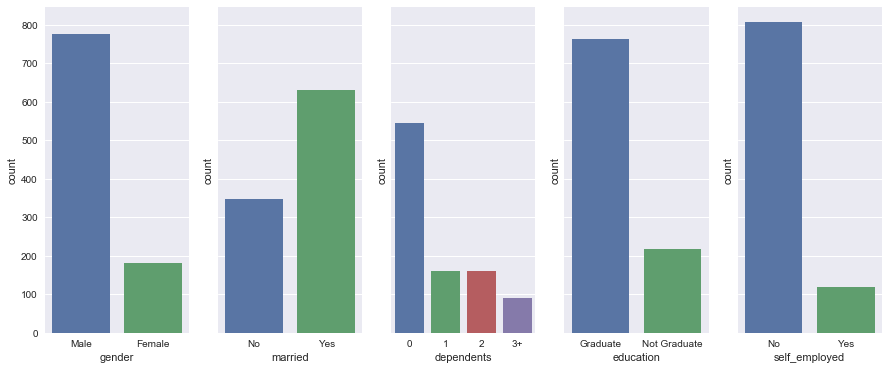

In [34]:
f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(ncols=5, sharey=True,figsize=(15,6))

sns.countplot(x='gender',data=cat_df_loan,ax=ax1)
sns.countplot(x='married',data=cat_df_loan,ax=ax2)
sns.countplot(x='dependents',data=cat_df_loan,ax=ax3)
sns.countplot(x='education',data=cat_df_loan,ax=ax4)
sns.countplot(x='self_employed',data=cat_df_loan,ax=ax5)

In [63]:
corr_matrix = df_loan_dataset.corr()
corr_matrix["loanamount"]

applicantincome      0.551811
coapplicantincome    0.179228
loanamount           1.000000
loan_amount_term     0.055636
credit_history      -0.008235
Name: loanamount, dtype: float64

In [64]:
corr_matrix

,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history
applicantincome,1.000000,-0.114247,0.551811,-0.023089,0.023378
coapplicantincome,-0.114247,1.000000,0.179228,-0.043860,-0.027253
loanamount,0.551811,0.179228,1.000000,0.055636,-0.008235
loan_amount_term,-0.023089,-0.043860,0.055636,1.000000,-0.020439
credit_history,0.023378,-0.027253,-0.008235,-0.020439,1.000000


C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002389C8996D8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002389E14D208>]], dtype=object)

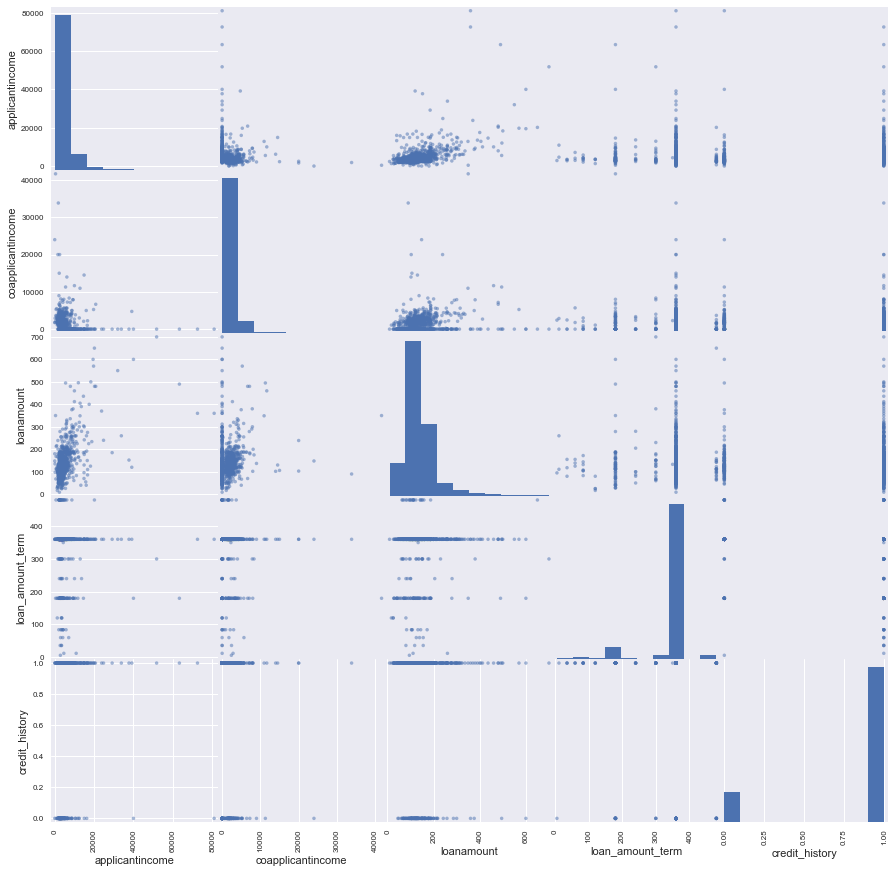

In [66]:
from pandas.tools.plotting import scatter_matrix
attributes = ["applicantincome", "coapplicantincome", "loanamount","loan_amount_term","credit_history"]
scatter_matrix(df_loan_dataset[attributes], figsize=(15, 15))

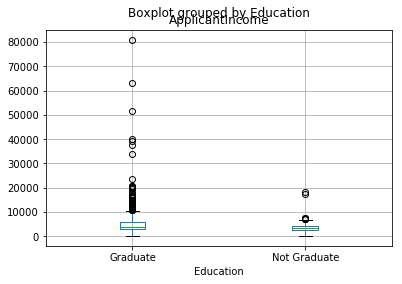

In [11]:
df.boxplot(column='ApplicantIncome', by = 'Education')

In [12]:
df["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [16]:
df.loc[(df["Gender"] == "Female") & (df["Education"] == "Not Graduate") & (df["Loan_Status"] == "Y"), ["Gender","Loan_Status"]]

,Gender,Loan_Status
50,Female,Y
197,Female,Y
205,Female,Y
279,Female,Y
403,Female,Y
407,Female,Y
439,Female,Y
463,Female,Y
468,Female,Y
480,Female,Y


In [20]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())

print("Probability of getting loan for each Credit History Class")
print(temp2)

Probability of getting loan for each Credit History Class
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


In [26]:
temp1 = df['Self_Employed'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status',index=['Self_Employed'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())


print("Probability of getting loan for each Self_Employed Class")
print(temp2)

Probability of getting loan for each Self_Employed Class
               Loan_Status
Self_Employed             
No                0.686000
Yes               0.682927
